In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras #desde tensorflow 2 se importa keras,  como paquete integrado de tensorflow
import pandas as pd
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
import tensorflow as tf
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense,Flatten,LSTM,RepeatVector,TimeDistributed


In [4]:

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Reading the data set, parsing the dates and inferring the date format to date time. We also fill the Nan’s with 0.
#agrego index_col=0 para solucionar Unnamed: 0 porque https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe
dataset = read_csv("/content/drive/MyDrive/a Tesis de Grado/Tesis Versiones/tesis 2024/UA/tum transmedia/preprocesamiento/datos2023/UA2018Salida.csv", index_col=0)
#dataset.fillna(0, inplace=True)//pasar nans a ceros
#revisar lo que hago en el otro dataset
print(dataset.size)
print(dataset.columns)
columnaAPreadecir='Número de vistas de página'

for i in dataset.columns:
  if i != 'Fecha':
    dataset[i]= dataset[i].values.astype('float32')# ensure all data is float excepto la columna fecha
    #print(i,dataset[i].dtype)
print(dataset['Fecha'])
import datetime as dt
#print(pd.to_datetime("20 agos 2015", format='%d %b %Y', date_parser=dateparser.parse))
from dateutil.parser import parse
def parsefecha(date):
  dt = parse(date)
  print(date)
  return date
mapping_dict = {'ene':'JAN',
'feb':'FEB',
'mar':'MAR',
'abr':'APR',
'may':'MAY',
'jun':'JUN',
'jul':'JUL',
'ago':'AUG',
'sept':'SEP',
'oct':'OCT',
'nov':'NOV',
'dic':'DEC'}#https://stackoverflow.com/questions/70374750/convert-spanish-date-into-a-pandas-datetime-object
dataset["Fecha"]=pd.to_datetime(dataset["Fecha"].replace(mapping_dict, regex=True))#esto porque las fechas como agosto estan ago en español
print(dataset["Fecha"].dtype)
#dataset['Fecha'] = pd.to_datetime(dataset['Fecha'], format='%d %b %Y')
#dataset['Fecha']=dataset['Fecha'].apply(parsefecha)
#dataset.drop(["Fecha Inicio"], inplace=True, axis=1)
#for i in dataset["Fecha"]:
#  print(i,dataset["Fecha"].dtype)
print(dataset.shape)
print(dataset)
dataset.head()

53754
Index(['Fecha', 'Número de vistas de página', 'Usuarios nuevos', 'Usuarios',
       'Número de sesiones por usuario', 'Sesiones', 'Argentina',
       'Otros Paises', 'mobile', 'desktop', 'tablet',
       'Categoría de dispositivo promedio', 'Categoría de dispositivo std',
       'Windows', 'Android', 'Linux', 'Macintosh',
       'Sistema operativo (not set)', 'iOS', 'Windows Phone', 'Chrome OS',
       'Tizen', 'BlackBerry', 'Sistema operativo promedio',
       'Sistema operativo std', 'Organic Search', 'Social', 'Direct',
       'Referral', 'Agrupación de canales predeterminada promedio',
       'Agrupación de canales predeterminada std'],
      dtype='object')
0       22 ago 2018
1       23 ago 2018
2       24 ago 2018
3       25 ago 2018
4       26 ago 2018
           ...     
1729    26 may 2023
1730    29 may 2023
1731    30 may 2023
1732    31 may 2023
1733     1 jun 2023
Name: Fecha, Length: 1734, dtype: object


<ipython-input-5-c78105e8cfda>:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset["Fecha"]=pd.to_datetime(dataset["Fecha"].replace(mapping_dict, regex=True))#esto porque las fechas como agosto estan ago en español


datetime64[ns]
(1734, 31)
          Fecha  Número de vistas de página  Usuarios nuevos  Usuarios  \
0    2018-08-22                       200.0             23.0      23.0   
1    2018-08-23                        70.0             29.0      33.0   
2    2018-08-24                       323.0             20.0      27.0   
3    2018-08-25                       151.0             10.0      15.0   
4    2018-08-26                        37.0             12.0      13.0   
...         ...                         ...              ...       ...   
1729 2023-05-26                         9.0              3.0       6.0   
1730 2023-05-29                        50.0             18.0      27.0   
1731 2023-05-30                        62.0             26.0      38.0   
1732 2023-05-31                        34.0             10.0      16.0   
1733 2023-06-01                        81.0             30.0      41.0   

      Número de sesiones por usuario  Sesiones  Argentina  Otros Paises  \
0         

,Fecha,Número de vistas de página,Usuarios nuevos,Usuarios,Número de sesiones por usuario,Sesiones,Argentina,Otros Paises,mobile,desktop,...,Tizen,BlackBerry,Sistema operativo promedio,Sistema operativo std,Organic Search,Social,Direct,Referral,Agrupación de canales predeterminada promedio,Agrupación de canales predeterminada std
0,2018-08-22,200.0,23.0,23.0,1.217391,28.0,200.0,0.0,23.0,177.0,...,0.0,0.0,20.000000,48.885582,15.0,6.0,179.0,0.0,50.00,74.669273
1,2018-08-23,70.0,29.0,33.0,1.121212,37.0,69.0,1.0,29.0,41.0,...,0.0,0.0,7.000000,13.416408,18.0,7.0,45.0,0.0,17.50,17.124544
2,2018-08-24,323.0,20.0,27.0,1.333333,36.0,320.0,3.0,28.0,295.0,...,0.0,0.0,32.299999,86.294899,18.0,1.0,302.0,2.0,80.75,127.916718
3,2018-08-25,151.0,10.0,15.0,1.200000,18.0,149.0,2.0,44.0,107.0,...,0.0,0.0,15.100000,32.374218,6.0,0.0,145.0,0.0,37.75,61.969246
4,2018-08-26,37.0,12.0,13.0,1.153846,15.0,37.0,0.0,18.0,19.0,...,0.0,0.0,3.700000,7.156116,5.0,11.0,21.0,0.0,9.25,7.822244


In [6]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from copy import deepcopy
print('algun nan antes de sacar fechas',dataset.isnull().values.any())
fechaColumna=deepcopy(dataset['Fecha'])
dataset.drop(["Fecha"], inplace=True, axis=1)
X = dataset.values
#compruebo no hay ni un solo valor NaN en el dataset
print('algun nan',dataset.isnull().any())
print('algun nan',dataset.isnull().values.any())
nan_index = np.where(dataset.isnull())
nan_row=dataset.iloc[nan_index]
nan_row

algun nan antes de sacar fechas False
algun nan Número de vistas de página                       False
Usuarios nuevos                                  False
Usuarios                                         False
Número de sesiones por usuario                   False
Sesiones                                         False
Argentina                                        False
Otros Paises                                     False
mobile                                           False
desktop                                          False
tablet                                           False
Categoría de dispositivo promedio                False
Categoría de dispositivo std                     False
Windows                                          False
Android                                          False
Linux                                            False
Macintosh                                        False
Sistema operativo (not set)                      False
iOS              

""


In [7]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 7,metric='euclidean')#con 5

# fit model
nbrs.fit(X)

NearestNeighbors(metric='euclidean', n_neighbors=7)

desvio_distancias 39.11949634274003 13.54662778292081 39.11949634274003 78.23899268548006 91.78562046840086


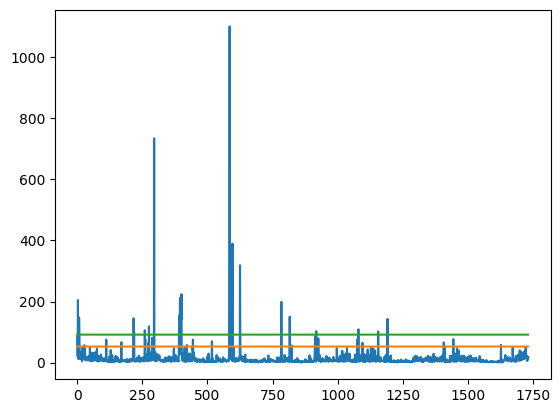

In [8]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation
media_distancias=distances.mean(axis =1)
plt.plot(media_distancias)
media=np.mean(media_distancias)
desvio_distancias= np.std(media_distancias)
desvio_distancias_array=np.arange(0,len(media_distancias)-1)
desvio_distancias_array2=deepcopy(desvio_distancias_array)
desvio_distancias_array.fill(desvio_distancias)
desvio_distancias_array2.fill(desvio_distancias*2)
plt.plot(media+desvio_distancias_array)
plt.plot(media+desvio_distancias_array2)
print('desvio_distancias',desvio_distancias,media,desvio_distancias,desvio_distancias*2,media+desvio_distancias*2)

In [9]:
# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) > 500)
outlier_index

(array([295, 585]),)

In [11]:
# filter outlier values
outlier_values = dataset.iloc[outlier_index]
outlier_values

,Número de vistas de página,Usuarios nuevos,Usuarios,Número de sesiones por usuario,Sesiones,Argentina,Otros Paises,mobile,desktop,tablet,...,Tizen,BlackBerry,Sistema operativo promedio,Sistema operativo std,Organic Search,Social,Direct,Referral,Agrupación de canales predeterminada promedio,Agrupación de canales predeterminada std
295,650.0,8.0,12.0,1.250000,15.0,647.0,3.0,8.0,642.0,0.0,...,0.0,0.0,65.000000,189.689224,639.0,0.0,11.0,0.0,162.5,275.144043
585,1014.0,62.0,73.0,1.232877,90.0,1002.0,12.0,215.0,799.0,0.0,...,0.0,0.0,101.400002,188.815353,805.0,0.0,209.0,0.0,253.5,329.642609


In [ ]:
plt.scatter(dataset['Número de vistas de página'],dataset['Usuarios nuevos'])
plt.scatter(outlier_values['Número de vistas de página'], outlier_values['Número de vistas de página'], color = "r")
print(X[:,0],'\n otro \n ',X[:,1])
#Número de vistas de página X Usuarios nuevos

Text(0, 0.5, 'Usuarios nuevos')

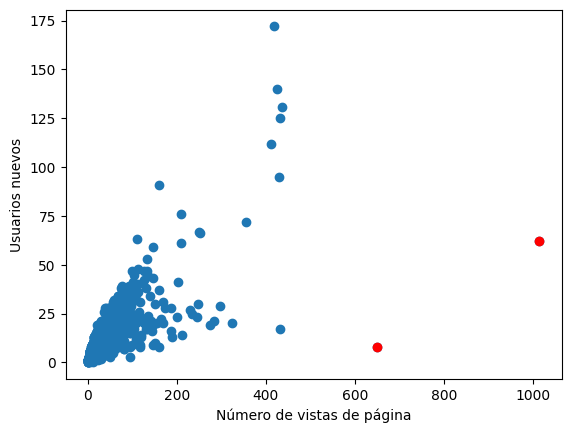

In [15]:
plt.scatter(dataset['Número de vistas de página'],dataset['Usuarios nuevos'])
plt.scatter(outlier_values['Número de vistas de página'], outlier_values['Usuarios nuevos'], color = "r")
plt.xlabel('Número de vistas de página')
plt.ylabel('Usuarios nuevos')

Text(0, 0.5, 'Sesiones')

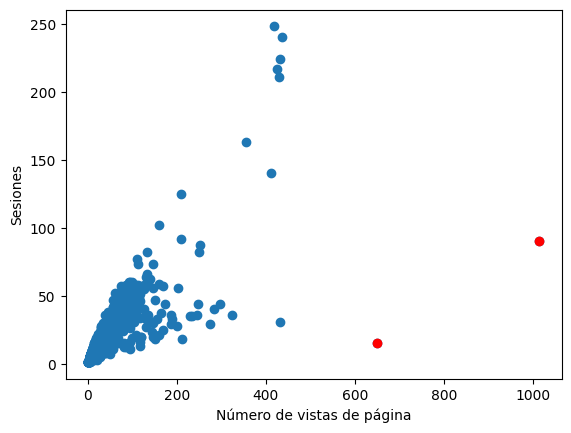

In [16]:
plt.scatter(dataset['Número de vistas de página'],dataset['Sesiones'])
plt.scatter(outlier_values['Número de vistas de página'], outlier_values['Sesiones'], color = "r")
plt.xlabel('Número de vistas de página')
plt.ylabel('Sesiones')

In [ ]:

#agregar columna fecha Nuevamente
dataset['Fecha']=fechaColumna
outlier_index[0]

array([295, 585])

In [ ]:
dataset = dataset.drop(outlier_index[0])
dataset = dataset.drop('BlackBerry', axis=1)

print(dataset.values.shape)
#print(update_df.values.shape)
#dataset=update_df

(1732, 30)


In [ ]:


# Definimos las ventanas basadas en la secuencia de Fibonacci (6, 12, 18, 30, 48...)
from sklearn.impute import SimpleImputer
df=deepcopy(dataset)
ventanas = [6, 12, 18, 30, 48, 78, 126, 203, 329]
columna='Número de vistas de página'
# Calcular la mediana móvil (rolling median) para cada ventana y agregarla como una columna nueva en el DataFrame
df.drop(["Fecha"], inplace=True, axis=1)
# Calcular la mediana móvil (rolling median) para cada ventana y agregarla como una columna nueva en el DataFrame
for ventana in ventanas:
    df[f'rolling_median_{ventana}'] = df[columna].rolling(window=ventana).median()

# Reemplazar los NaNs en las columnas de medianas móviles con la media de cada columna
for ventana in ventanas:
    col = f'rolling_median_{ventana}'
    df[col].fillna(df[col].mean(), inplace=True)

# Calcular la mediana de las medianas (por fila) y agregarla como una nueva columna
df['mediana_de_medianas'] = df[[f'rolling_median_{v}' for v in ventanas]].median(axis=1)

# Mostrar el DataFrame resultante
print(df)

dataset['mediana_de_medianas']=df['mediana_de_medianas']

      Número de vistas de página  Usuarios nuevos  Usuarios  \
0                          200.0             23.0      23.0   
1                           70.0             29.0      33.0   
2                          323.0             20.0      27.0   
3                          151.0             10.0      15.0   
4                           37.0             12.0      13.0   
...                          ...              ...       ...   
1729                         9.0              3.0       6.0   
1730                        50.0             18.0      27.0   
1731                        62.0             26.0      38.0   
1732                        34.0             10.0      16.0   
1733                        81.0             30.0      41.0   

      Número de sesiones por usuario  Sesiones  Argentina  Otros Paises  \
0                           1.217391      28.0      200.0           0.0   
1                           1.121212      37.0       69.0           1.0   
2                 

<ipython-input-67-8847db652abb>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
#agregar lagged datapints
#df=deepcopy(dataset)
columna='Número de vistas de página'
lags=[int(3*30), int(30*6), int(30*9), int(30*12)]
for lag in lags:
    dataset[f'lag_{lag}'] = dataset[columna].shift(lag)
#dataset=dataset[[f'lag_{lag}' for lag in lags]]
# Reemplazar los NaNs en las columnas de medianas móviles con la media de cada columna
for lag in lags:
    col = f'lag_{lag}'
    dataset[col].fillna(dataset[col].mean(), inplace=True)
    '''The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

    For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.
    '''
ver=dataset[[f'lag_{lag}' for lag in lags]]
ver

<ipython-input-72-261476a2b0dd>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mean(), inplace=True)


,lag_90,lag_180,lag_270,lag_360
0,32.290501,33.648197,34.116962,34.365891
1,32.290501,33.648197,34.116962,34.365891
2,32.290501,33.648197,34.116962,34.365891
3,32.290501,33.648197,34.116962,34.365891
4,32.290501,33.648197,34.116962,34.365891
...,...,...,...,...
1729,13.000000,24.000000,109.000000,100.000000
1730,15.000000,2.000000,46.000000,22.000000
1731,30.000000,22.000000,28.000000,39.000000
1732,42.000000,9.000000,29.000000,4.000000


In [ ]:
print('algun nan\n',dataset.isnull().any(),'\n')
#print('algun nan',dataset.isnull().values.any(),'\n')
#nan_index = np.where(dataset.isnull().values.any())

#nan_index2 = np.where(dataset['Predictor Flag'].isnull())
#nan_row=dataset.iloc[nan_index2]
#nan_row

nan_index = np.where(np.atleast_1d(dataset.isnull().values.any()))

#np.where() devuelve una tupla de arrays, por lo que puedes acceder al primer elemento
# que contendrá los índices de los valores nan, si los hay
dataset=dataset.dropna()

algun nan
 Número de vistas de página                       False
Usuarios nuevos                                  False
Usuarios                                         False
Número de sesiones por usuario                   False
Sesiones                                         False
Argentina                                        False
Otros Paises                                     False
mobile                                           False
desktop                                          False
tablet                                           False
Categoría de dispositivo promedio                False
Categoría de dispositivo std                     False
Windows                                          False
Android                                          False
Linux                                            False
Macintosh                                        False
Sistema operativo (not set)                      False
iOS                                              False

In [ ]:
dataset.drop(["Fecha"], inplace=True, axis=1)
print(dataset)
salidaCarpeta="/content/drive/MyDrive/a Tesis de Grado/Tesis Versiones/tesis 2024/UA/tum transmedia/preprocesamiento/outlier/salidaCSV"
NombreArchivoCSV="/salidaKNN2024_15Octubre.csv"
dataset.to_csv(salidaCarpeta + NombreArchivoCSV)
print(dataset.columns)
print(len(dataset.columns))


      Número de vistas de página  Usuarios nuevos  Usuarios  \
0                          200.0             23.0      23.0   
1                           70.0             29.0      33.0   
2                          323.0             20.0      27.0   
3                          151.0             10.0      15.0   
4                           37.0             12.0      13.0   
...                          ...              ...       ...   
1729                         9.0              3.0       6.0   
1730                        50.0             18.0      27.0   
1731                        62.0             26.0      38.0   
1732                        34.0             10.0      16.0   
1733                        81.0             30.0      41.0   

      Número de sesiones por usuario  Sesiones  Argentina  Otros Paises  \
0                           1.217391      28.0      200.0           0.0   
1                           1.121212      37.0       69.0           1.0   
2                 

In [ ]:
#You can see the disk information using a command like !df -h.
#To see CPU specs, !cat /proc/cpuinfo.
#For memory, !cat /proc/meminfo.
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         226G   37G  190G  17% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs           6.4G  7.3M  6.4G   1% /var/colab
/dev/sda1       233G   62G  171G  27% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive           100G   40G   61G  40% /content/drive


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
ad

In [ ]:
!cat /proc/meminfo

MemTotal:       13290460 kB
MemFree:         8280860 kB
MemAvailable:   11109412 kB
Buffers:          481736 kB
Cached:          2499432 kB
SwapCached:            0 kB
Active:          1215192 kB
Inactive:        3463756 kB
Active(anon):       2600 kB
Inactive(anon):  1704132 kB
Active(file):    1212592 kB
Inactive(file):  1759624 kB
Unevictable:          20 kB
Mlocked:              20 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               512 kB
Writeback:             0 kB
AnonPages:       1697828 kB
Mapped:           739864 kB
Shmem:              8940 kB
KReclaimable:     181740 kB
Slab:             228288 kB
SReclaimable:     181740 kB
SUnreclaim:        46548 kB
KernelStack:        7296 kB
PageTables:        35068 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6645228 kB
Committed_AS:    4120728 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       13656 kB
VmallocChunk:    